# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 0.95909464,  1.04087621],
        [ 0.13356044,  0.79250051],
        [-0.55521553, -0.36371898],
        [ 0.95024612, -0.59926745],
        [ 0.41562031, -0.28245736]]),
 array([1, 1, 1, 1, 1]))

In [4]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [5]:
# sampling
n = 500
p = 2
Y_generative = np.concatenate([np.ones(n), -np.ones(n)])
X_generative = np.concatenate([np.random.multivariate_normal(m1, sigma, n),
                          np.random.multivariate_normal(m2, sigma, n)])
                         

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [6]:
# computing beta_0 and beta using the formulas
p_y1 = 1/2
b0 = np.log(p_y1 / (1 - p_y1)) + 1/2 * (m2 - m1).T @ np.linalg.inv(sigma) @ (m2 - m1)
b1 = np.linalg.inv(sigma) @ (m1 - m2)
b0, b1

(2.0, array([2., 2.]))

In [7]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.18793606]), array([[2.20449542, 2.23046524]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [35]:
# sampling
n = 1000
b0 = -2
b1 = np.array([2, 2])
which_gaussian = np.random.binomial(1, 0.5, n)
first_gauss = sum(which_gaussian)
X_discriminative = np.concatenate([np.random.multivariate_normal(m1, sigma, first_gauss),
    np.random.multivariate_normal(m2, sigma, n-first_gauss)]) 
weights = 1 / (1 + np.exp(- b0 - b1@X_discriminative.T))
Y_discriminative = np.random.binomial(1, weights, n)

In [36]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-2.20616042]), array([[2.19963244, 2.12088292]]))

#### Second bullet point

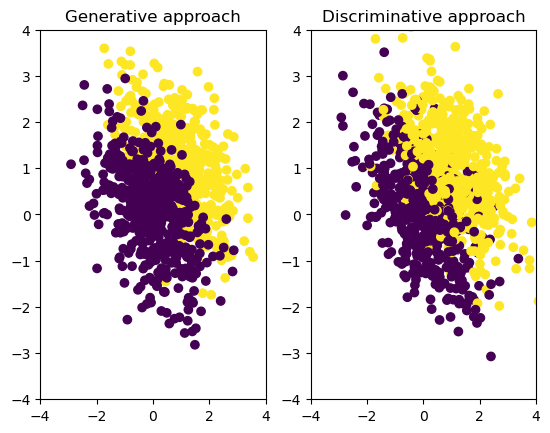

In [39]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.title('Generative approach')
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.title('Discriminative approach')
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach? 

We have the same joint distributions of $p(x,y)$ (as seen in scatterplots), but the two approches differ from a simulation and modeling point of view. For example, in generative approach we cannot estimate $\pi$. In generative approach $\pi$ and $beta_0$ are entangled as indicated by the formulas in a). 

### c)

**Q1. What is the distribution of $f_{X|Y=-1}$?**

By using the Bayes theorem for $p(x|y=-1)$ and law of total probability for $p(x)$, we have:

$$p(y=1|x) = \frac{P(Y=1) \cdot p(x|y=1)}{P(Y=1) \cdot p(x|y=1) + P(Y=-1)\cdot p(x|y=-1)} = 
\frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)} \Rightarrow$$

$$ 
\begin{equation*} \label{a} \tag{1}
\Rightarrow p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}. 
\end{equation*}$$

$X|Y=1 \sim Exp(\lambda=1)$, therefore: 

$$
\begin{equation*} \label{b} \tag{2}
p(x|y=1) = \lambda e^{-\lambda x} \mathbb{1}_{(x\geq0)} = e^{-x}
\end{equation*}
$$ 

In logistic model we assume the following distributions:

$$
\begin{equation*} \label{c} \tag{3}
p(y=1|x) = \frac{1}{1+\exp(-\beta_0-\beta_1 x)} \\
p(y=-1|x) = \frac{1}{1+\exp(\beta_0+\beta_1 x)}
\end{equation*}
$$

By substituting $\eqref{b}$ and $\eqref{c}$ to $\eqref{a}$, we get:

$$
\begin{equation*} \label{d} \tag{4}
p(x|y=-1) = \frac{\pi e^{-x}(1 - \frac{1}{1+exp(-\beta_{0}+\beta_{1}x)})}{\frac{1}{1+exp(-\beta_{0}+\beta_{1}x)}(1-\pi)} =
= \frac{\pi}{1-\pi}e^{-x} e^{-\beta_{0} + \beta_{1}x} = \frac{\pi}{1-\pi}e^{-\beta_{0}} e^{-(1+\beta_{1})x}
\end{equation*}
$$

We know that a probability density function must integrate to 1:

$$
\int_{0}^{\infty} \frac{\pi}{1-\pi}e^{-\beta_{0}} e^{-(1+\beta_{1})x} dx = 1 \\
\frac{\pi}{1-\pi}e^{-\beta_{0}}  \int_{0}^{\infty} e^{-(1+\beta_{1})x} dx = 1 \\
\frac{\pi}{1-\pi}e^{-\beta_{0}}  \frac{1}{\beta_{1}+1} = 1 
$$

We get the following relation between $\pi, \beta_{0}$, and $\beta_{1}$:

$$
\begin{equation*} \label{e} \tag{5}
\frac{\pi}{1-\pi}e^{-\beta_{0}} = 1+\beta_{1}
\end{equation*}
$$

Substituting this back to $\eqref{d}$, we get:

$$
p(x|y=-1) = (1+\beta_{1})e^{-(1+\beta_{1})x}
$$

Therefore $X|Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$.

In this task we assume $\beta_{1}=1$, so $X|Y=-1 \sim Exp(\lambda=2)$

**Q2. Once π is fixed, do we have freedom to choose an intercept in the logistic model thus constructed?**

When $\pi$ is fixed, we can freely choose $\beta_{0}$, as long as we adjust $\beta_{1}$ so that equation $\eqref{e}$ is satisfied. If we want to fix $\beta_{1}$ as well, then we do not have the freedom of choosing $\beta_{0}$.

**Q3. If π is not given, is the intercept in the logistic model uniquely determined?**

The intercept depend on $\pi$ (equation $\eqref{e}$), so if $\pi$ is not given, then the intercept is not uniquely determined.

**Compute $\beta_{0}$**


We can estimate $\pi$ as $\frac{n_{1}}{n_{1}+n_{2}} = \frac{1}{3}$, then $\beta_{0}$ can be calculated from $\eqref{e}$ as follows:

$$
\beta_{0} = -ln(\frac{1-\pi}{\pi}(\beta_{1}+1)) = -ln(4)
$$

In [41]:
# sampling
n1 = 1000
n2 = 2000
beta_1 = 1

X1 = np.random.exponential(1, n1)
X2 = np.random.exponential(1/(beta_1 + 1), n2)
X = np.concatenate([X1, X2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [42]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.46096517]), array([[1.0965863]]))

In [45]:
# beta_0
pi = n1 / (n1 + n2)
beta_0 = -np.log((1 - pi)/pi * (beta_1 + 1))
print(f'beta_0: {beta_0}')

beta_0: -1.3862943611198908


## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)